In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
from matplotlib import pyplot as plt


In [12]:
# Load data
df = pd.read_parquet('snotel_data.parquet')
df.describe()

,snow_depth,B01,B02,B03,B04,B05,B06,B07,B08,B09,B10,is_snow
count,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,508.000000,1173.000000,1173.000000,1173.000000
mean,44.012788,3434.475703,3519.913043,3555.179881,3494.665814,3963.502131,2667.466326,2533.001705,4063.033465,890.605286,-127.798806,0.183291
std,46.783603,3510.476498,3448.842294,3286.112765,3279.042806,2971.052012,2608.248773,2581.475578,2588.951396,1630.725702,1482.819372,0.387070
min,0.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-214.000000,-9999.000000,-9999.000000,0.000000
25%,0.000000,292.000000,336.000000,494.000000,431.000000,1865.000000,1025.000000,648.000000,2007.000000,36.000000,-668.000000,0.000000
50%,29.000000,2673.000000,3029.000000,3241.000000,3235.000000,3617.000000,1858.000000,1992.000000,3549.000000,432.000000,28.000000,0.000000
75%,85.000000,6157.000000,6046.000000,5849.000000,5744.000000,5965.000000,4078.000000,3759.000000,5650.000000,1175.000000,408.000000,0.000000
max,158.000000,15553.000000,15570.000000,16060.000000,15634.000000,16012.000000,16014.000000,16002.000000,16019.000000,12471.000000,4212.000000,1.000000


In [13]:

# Load input and output columns from data frame
input_columns = [f"B{i:02d}" for i in range(1, 11)] + ["is_snow"]
input_data = df[input_columns].values
output_columns = ['snow_depth']
output_data = df[output_columns].values


In [14]:
# Scale data
X_scaler = MinMaxScaler()
X_scaled = X_scaler.fit_transform(input_data).astype(np.float32)
Y_scaler = MinMaxScaler()
Y_scaled = Y_scaler.fit_transform(output_data).astype(np.float32)

In [15]:

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, Y_scaled, test_size=0.33, random_state=42)


In [16]:
y_test[0].shape

(1,)

# Train models

## Linear model



In [18]:
# linear_model = LinearRegression()
# linear_model.fit(X_train, y_train)
# linear_y_pred = linear_model.predict(X_test)
# linear_pearsonr = pearsonr(linear_y_pred, y_test)
# linear_pearsonr

## Random Forest model

In [19]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
random_forest_y_pred = rf_model.predict(X_test)
random_forest_pearsonr = pearsonr(random_forest_y_pred, y_test[:,0])
random_forest_pearsonr

/Users/aimeebarciauskas/github/ski-project/ski-project/lib/python3.12/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


PearsonRResult(statistic=np.float64(0.7079498927219733), pvalue=np.float64(2.87228320314121e-60))

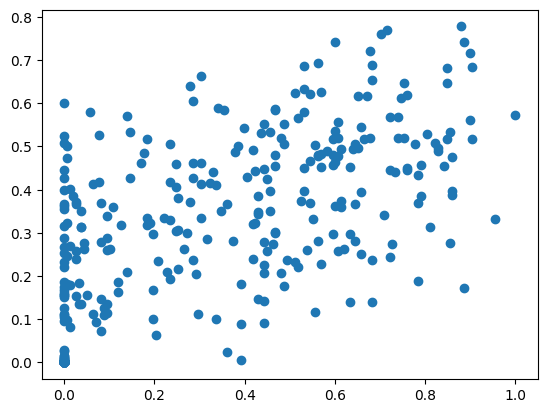

In [20]:
plt.scatter(y_test[:,0], random_forest_y_pred)

In [10]:
# Save models and scalers
import joblib

# Save individual models
joblib.dump(rf_model, 'random_forest_model.pkl')
joblib.dump(X_scaler, 'X_scaler.pkl')
joblib.dump(Y_scaler, 'Y_scaler.pkl')

print("Models and scalers saved successfully!")


Models and scalers saved successfully!
